In [48]:
import glob
import librosa
import numpy as np
import os
import random
import soundfile as sf
import sys

sys.path.append("../src")
import localmodule

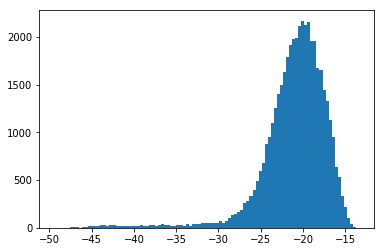

In [113]:
data_dir = "/Users/vl238/spl2017_data"
aug_str = "original"
unit_str = "unit01"
label = "1"

dataset_name = localmodule.get_dataset_name()
dataset_clips_name = "_".join([dataset_name, "audio-clips"])
dataset_clips_dir = os.path.join(data_dir, dataset_clips_name)
augmentations = localmodule.get_augmentations()
n_instances = augmentations[aug_str]
instance_id = 0
if aug_str == "original":
    instanced_aug_str = aug_str
else:
    instance_str = str(instance_id)
    instanced_aug_str = "_".join([aug_str, instance_str])
aug_clips_dir = os.path.join(dataset_clips_dir, instanced_aug_str)
unit_dir = os.path.join(aug_clips_dir, unit_str)
unit_regexp = os.path.join(unit_dir, "*.wav")
unit_glob = glob.glob(unit_regexp)
wav_names = [os.path.split(name)[1] for name in unit_glob]
wav_names = [name for name in wav_names if name[23] == label]
wav_name = random.choice(wav_names)
wav_path = os.path.join(unit_dir, wav_name)
waveform = librosa.load(wav_path, sr=target_sr)[0]

fmin = 2000
win_length = 256
hop_length = 32
window = 'hann'
n_mels = 128
n_fft = 1024
sr = 22050

stft = librosa.stft(waveform, n_fft=n_fft, win_length=win_length,
    hop_length=hop_length, window=window)
abs2_stft = (stft.real*stft.real) + (stft.imag*stft.imag)
melspec = librosa.feature.melspectrogram(
    y=None, S=abs2_stft, sr=sr, n_fft=n_fft,
    n_mels=n_mels, htk=True, fmin=fmin, fmax=target_sr/2.0)
logmelspec = 0.5 * librosa.logamplitude(melspec, ref=1.0)

%matplotlib inline
import librosa.display
from matplotlib import pyplot as plt
x = plt.hist(np.ravel(logmelspec), bins=100);

In [115]:
logmelspec.dtype

dtype('float64')

In [111]:
abs2_stft

array([[  9.46177065e-01+0.j,   1.13483715e+00+0.j,   1.58797395e+00+0.j,
        ...,   3.46319913e-03+0.j,   1.51252616e-02+0.j,
          1.19733466e-02+0.j],
       [  8.22293758e-01+0.j,   1.03825712e+00+0.j,   1.51451063e+00+0.j,
        ...,   6.16034167e-03+0.j,   1.42608033e-02+0.j,
          1.07106958e-02+0.j],
       [  5.21699190e-01+0.j,   7.98183084e-01+0.j,   1.31753671e+00+0.j,
        ...,   1.24849454e-02+0.j,   1.18689099e-02+0.j,
          7.59172672e-03+0.j],
       ..., 
       [  2.21765686e-06+0.j,   1.58600176e-06+0.j,   5.34425112e-07+0.j,
        ...,   9.40206010e-05+0.j,   1.08718326e-04+0.j,
          8.75265978e-05+0.j],
       [  2.14664715e-06+0.j,   1.54250665e-06+0.j,   4.82118367e-07+0.j,
        ...,   9.10674426e-05+0.j,   1.16370567e-04+0.j,
          1.27113963e-04+0.j],
       [  2.12372652e-06+0.j,   1.52997779e-06+0.j,   4.57296380e-07+0.j,
        ...,   9.00758168e-05+0.j,   1.19619450e-04+0.j,
          1.42827819e-04+0.j]], dtype=complex6